In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/fu/Downloads/Apps/Git_Projects/kemal_tariffs/output/3-Stufen Auslösung optimiert/3-Stufen Auslösung optimiert_neu.csv', sep=';', encoding='latin-1')
prices = df['dynamic'].values
prices_reshaped = prices.reshape(365, 24)
prices_reshaped

array([[16.7220585, 17.2343535, 17.1843735, ..., 22.9895505, 23.110752 ,
        21.7413   ],
       [24.6039045, 23.8242165, 23.9816535, ..., 35.0697165, 34.2250545,
        32.889339 ],
       [33.6127995, 32.36205  , 32.207112 , ..., 33.7352505, 31.6460865,
        29.070867 ],
       ...,
       [17.36805  , 17.358054 , 17.333064 , ..., 17.997798 , 20.229405 ,
        19.7283555],
       [18.1040055, 17.7141615, 18.477606 , ..., 24.410232 , 23.628045 ,
        22.7696385],
       [21.933723 , 19.0261365, 17.86785  , ..., 18.11775  , 18.702516 ,
        17.672928 ]])

In [2]:
hours = np.tile(np.arange(24), 365)  # Repeat the hours for each day
prices_flat = prices_reshaped.flatten()  # Flatten the reshaped prices for plotting
prices_flat

array([16.7220585, 17.2343535, 17.1843735, ..., 18.11775  , 18.702516 ,
       17.672928 ])

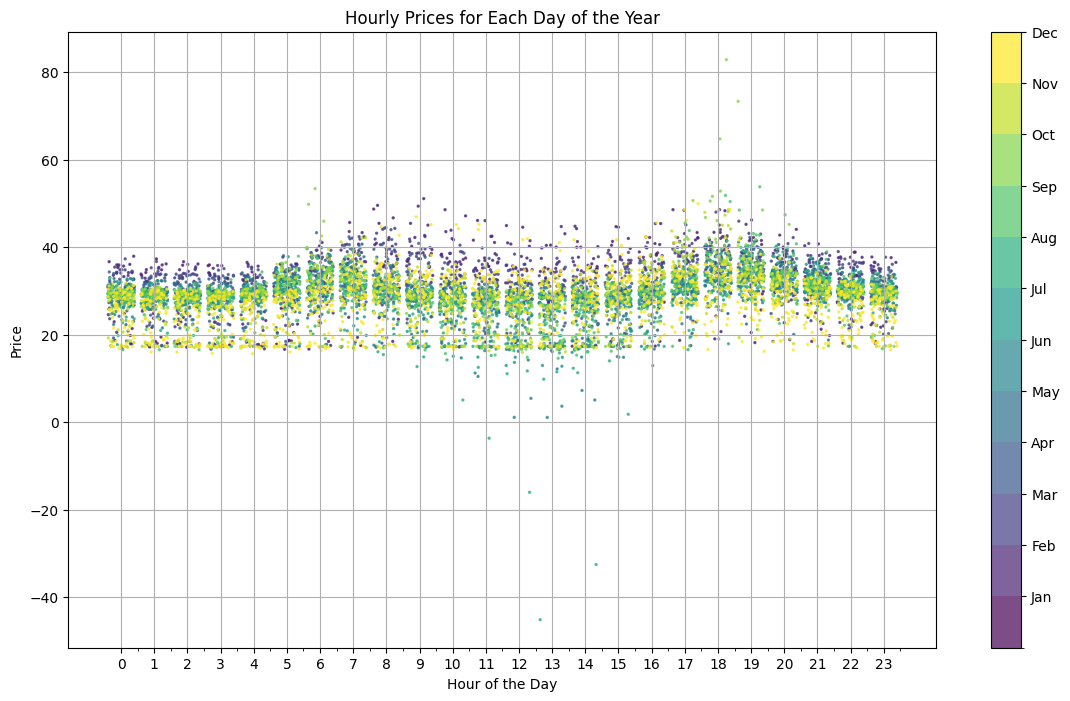

In [3]:
import matplotlib.colors as mcolors

hours_jittered = hours + np.random.uniform(-0.4, 0.4, len(hours))
months = pd.date_range(start='2023-01-01', periods=365).month
month_labels = np.repeat(months, 24)

# Create a color mapping for months
unique_months = np.unique(months)
cmap = plt.get_cmap('viridis', len(unique_months))
norm = mcolors.BoundaryNorm(np.arange(len(unique_months)+1), len(unique_months))

# Create the scatter plot with a color map
fig, ax = plt.subplots(figsize=(14, 8))
sc = ax.scatter(hours_jittered, prices_flat, c=month_labels, cmap=cmap, norm=norm, alpha=0.7, s=2)

# Customize the color bar to show months
cbar = plt.colorbar(sc, ax=ax, ticks=unique_months)
cbar.ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Price')
ax.set_title('Hourly Prices for Each Day of the Year')
ax.set_xticks(np.arange(24))
ax.set_xticks(np.arange(24) + 0.5, minor=True)  # Add minor ticks for better separation
ax.grid(True)

plt.savefig(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\Datenanalyse\year')

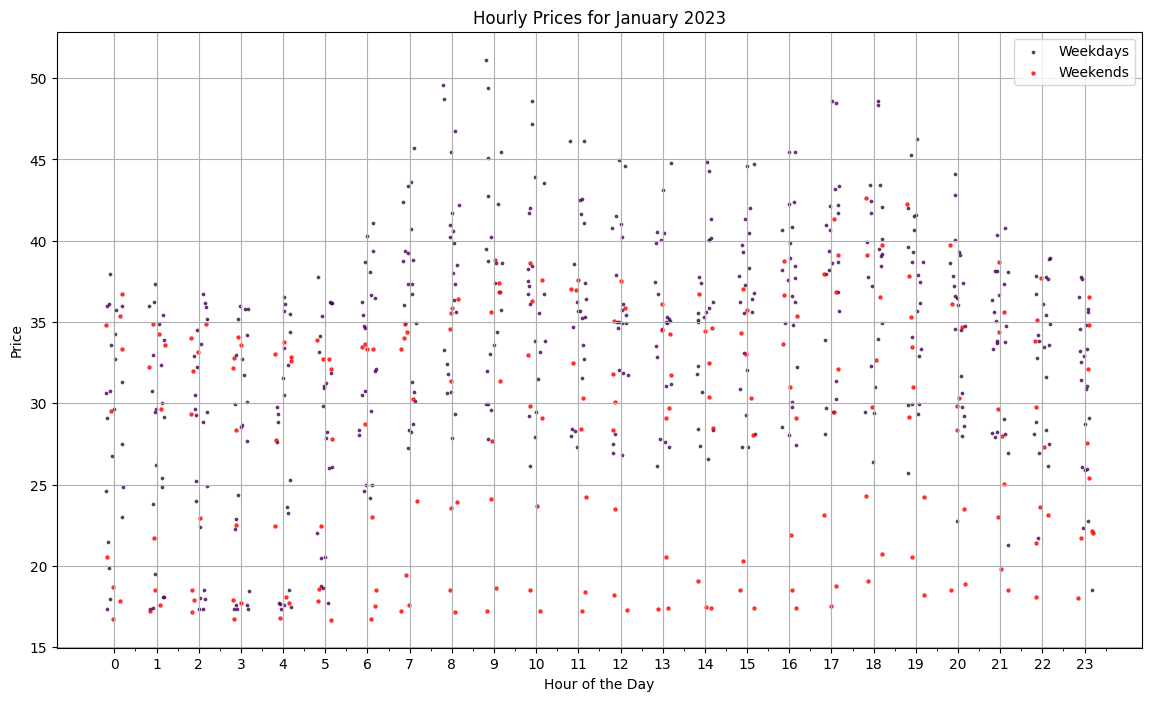

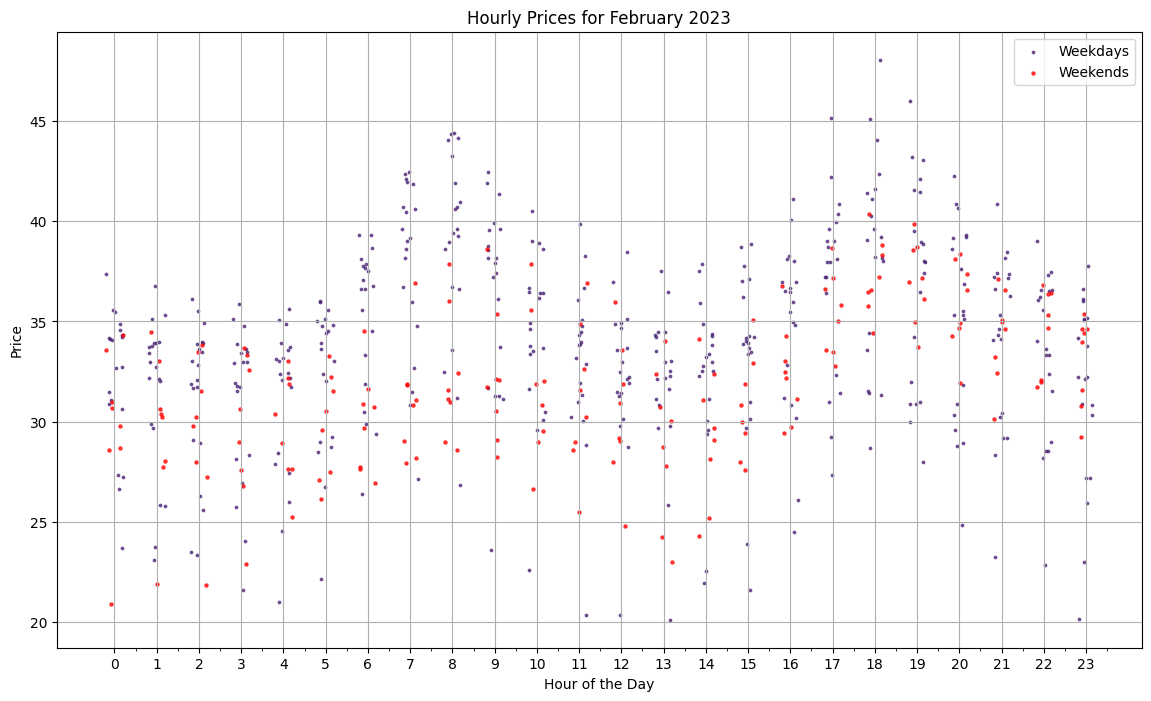

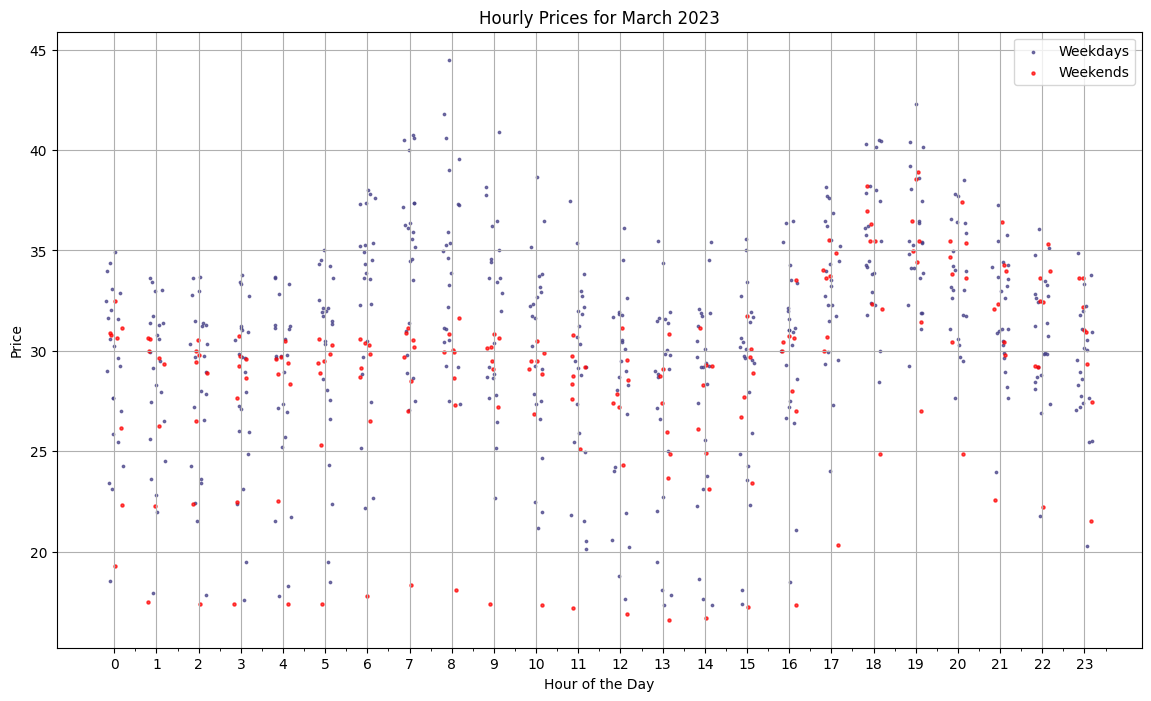

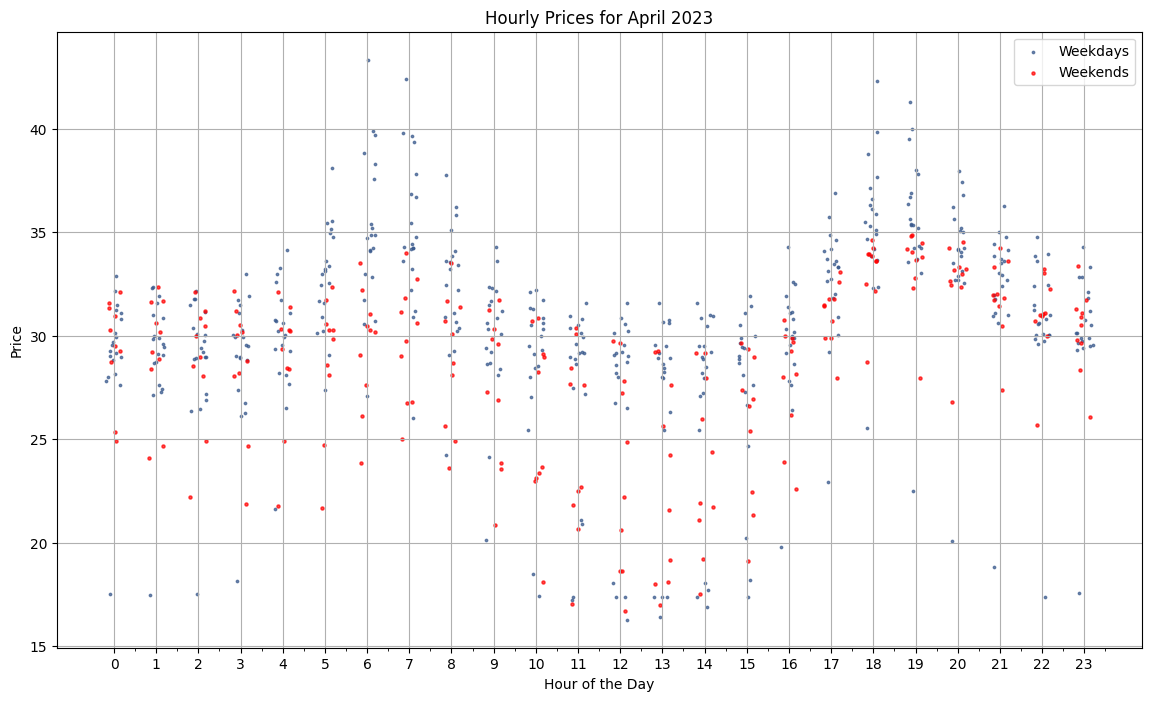

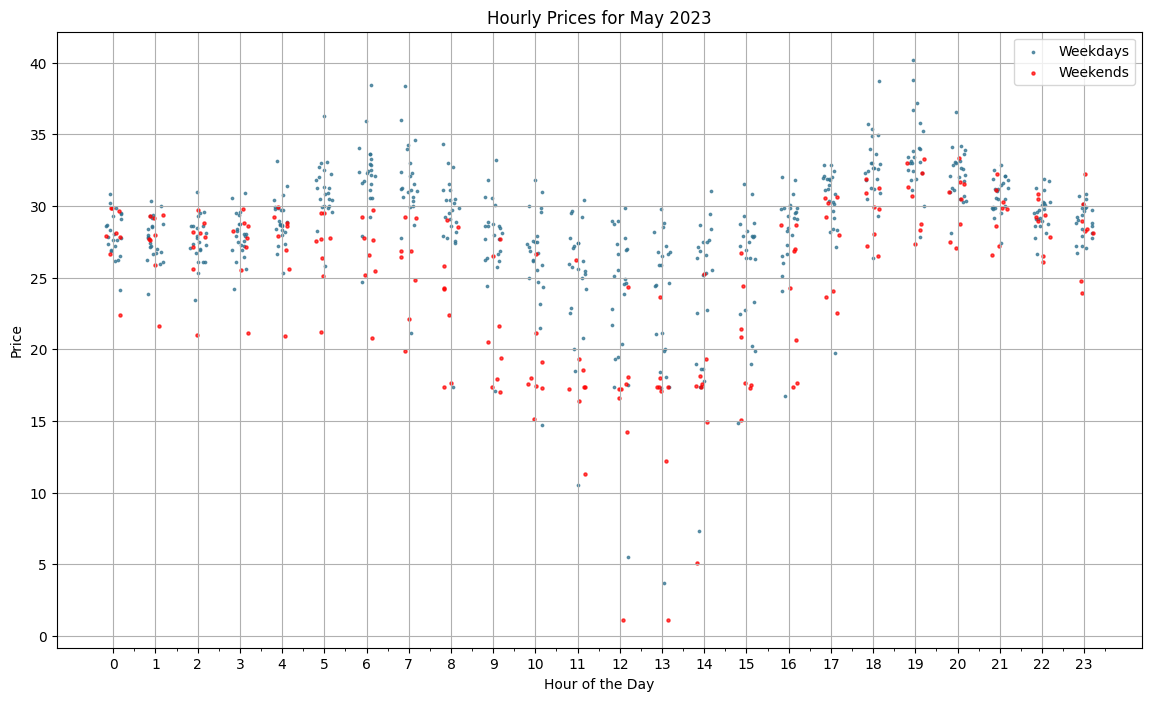

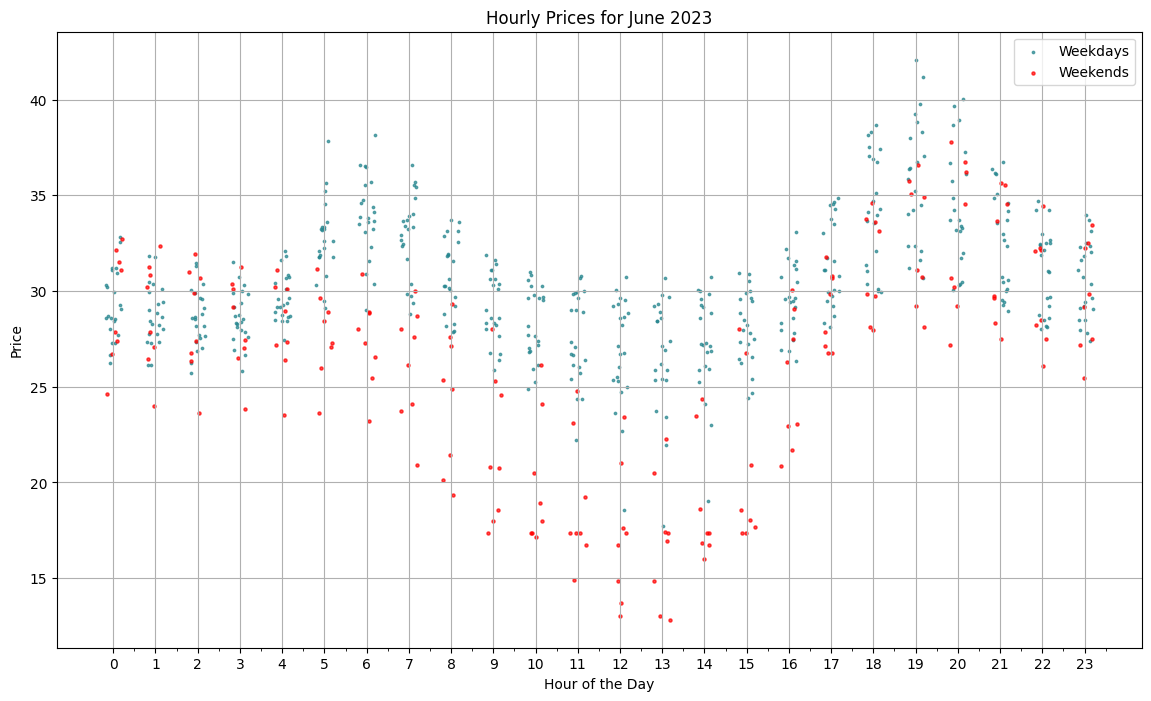

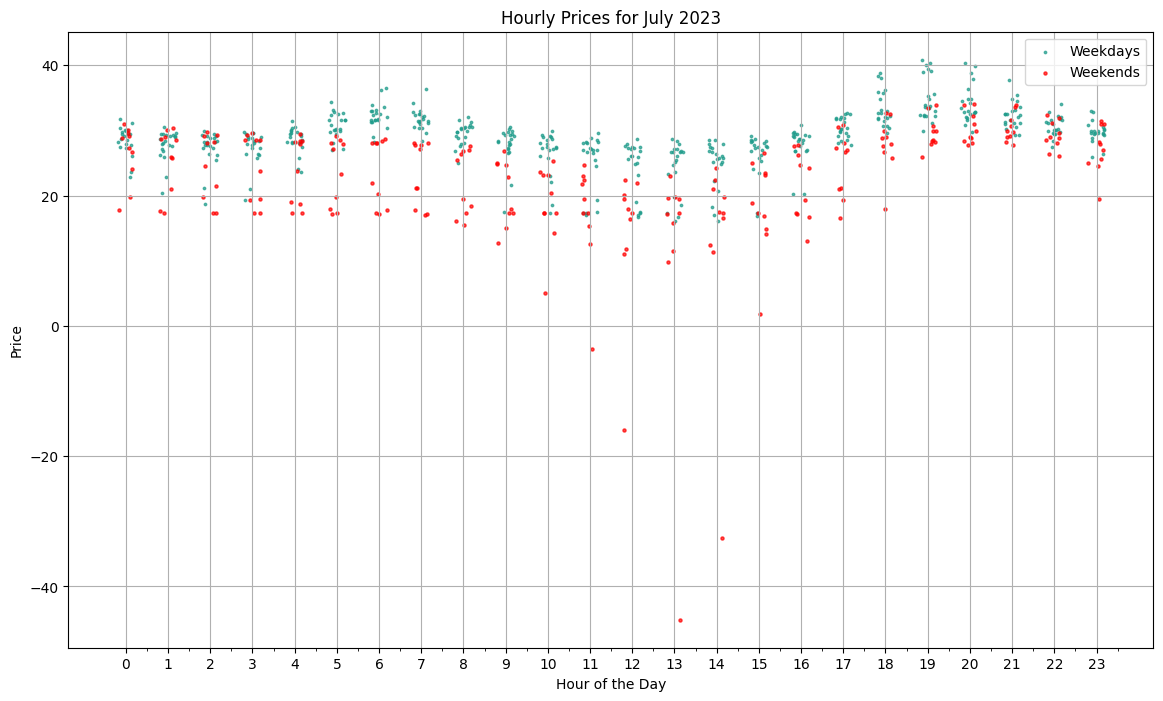

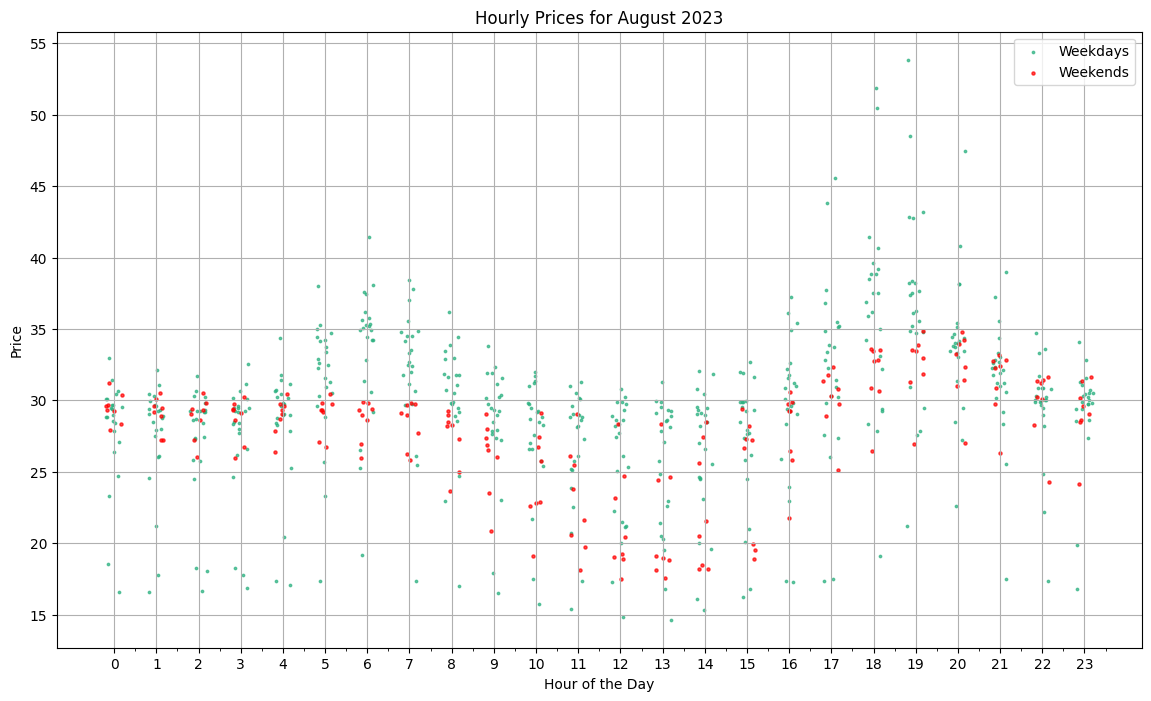

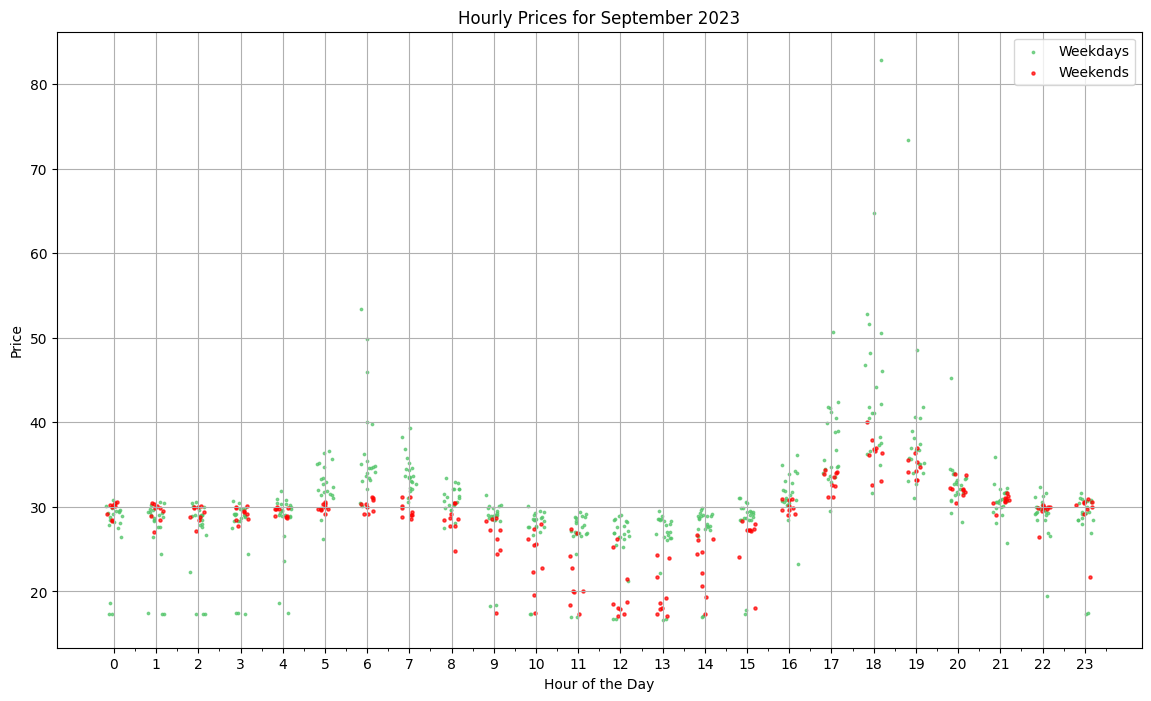

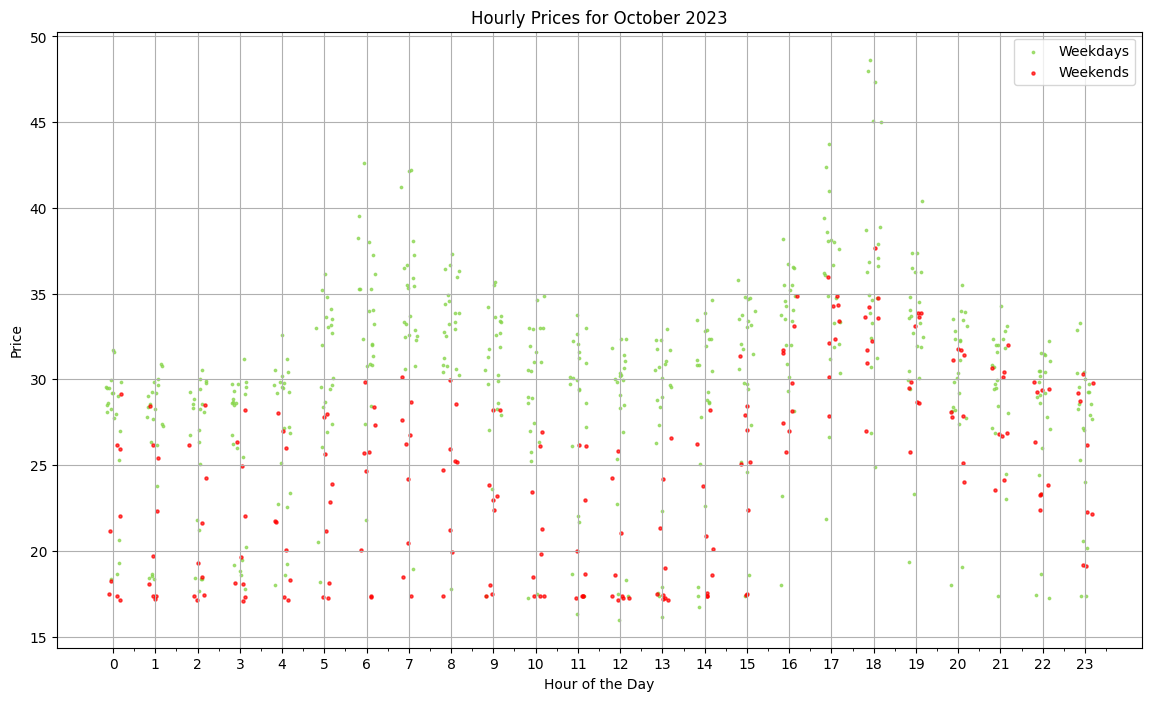

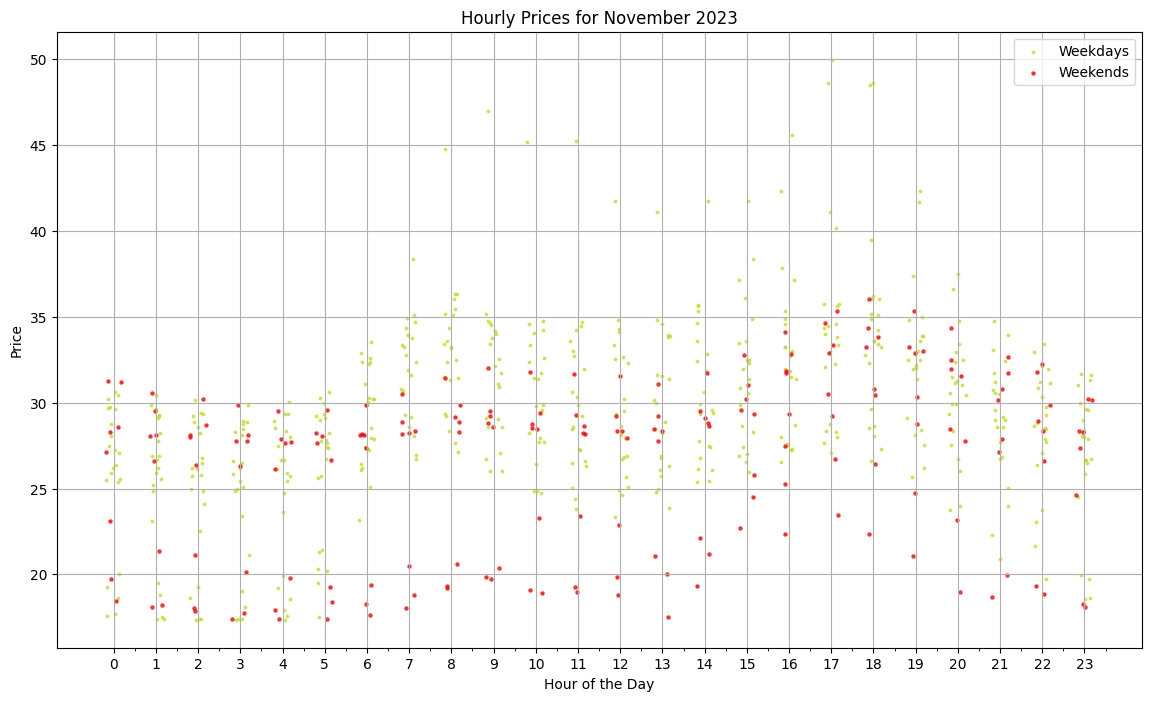

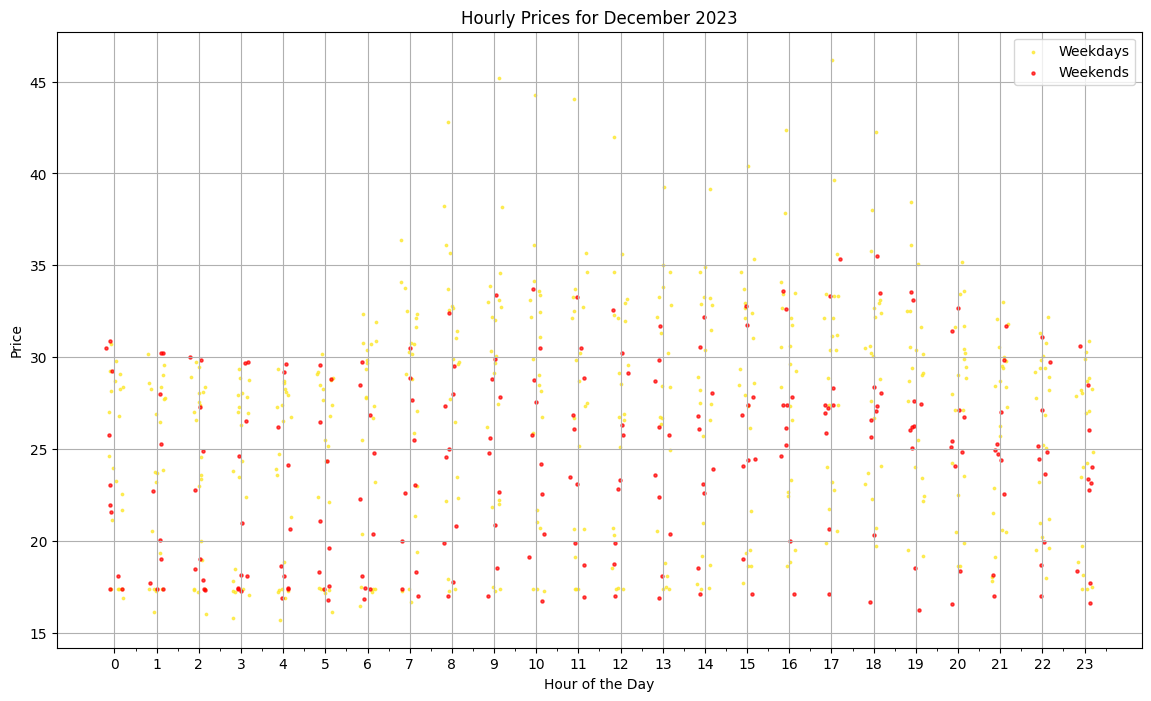

In [4]:
import calendar
dates = pd.date_range(start='2023-01-01', periods=365)
months = dates.month
weekdays = dates.weekday

# Map months to month names for labeling
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Generate 12 unique colors from the viridis colormap
viridis_cmap = plt.get_cmap('viridis', 12)
unique_colors = viridis_cmap(np.linspace(0, 1, 12))

# Iterate through each month to create separate plots
for month in range(1, 13):
    # Filter data for the current month
    month_mask = months == month
    prices_month = prices_reshaped[month_mask]
    hours_month = np.tile(np.arange(24), sum(month_mask))  # Repeat hours for each day in the month
    prices_flat_month = prices_month.flatten()
    hours_jittered_month = hours_month + np.random.uniform(-0.2, 0.2, len(hours_month))
    
    # Determine weekends
    weekends = weekdays[month_mask]
    weekends_repeated = np.repeat(weekends, 24)
    is_weekend = (weekends_repeated >= 5)
    
    # Create the scatter plot for the current month
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot weekdays with the unique color for the current month
    weekday_prices = prices_flat_month[~is_weekend]
    weekday_hours = hours_jittered_month[~is_weekend]
    ax.scatter(weekday_hours, weekday_prices, c=[unique_colors[month-1]], alpha=0.7, s=3, label='Weekdays')
    
    # Plot weekends in red
    weekend_prices = prices_flat_month[is_weekend]
    weekend_hours = hours_jittered_month[is_weekend]
    ax.scatter(weekend_hours, weekend_prices, c='red', alpha=0.7, s=5, label='Weekends')
    
    # Set labels and title
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Price')
    ax.set_title(f'Hourly Prices for {month_names[month-1]} 2023')
    ax.set_xticks(np.arange(24))
    ax.set_xticks(np.arange(24) + 0.5, minor=True)  # Add minor ticks for better separation
    ax.grid(True)
    ax.legend(loc='upper right')
    #plt.show()
    plt.savefig(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\Datenanalyse\month_' + str(month))

single cluster for outlier removal:  [[30.9139682 30.9139682 30.9139682 30.9139682 30.9139682 30.9139682
  30.9139682 30.9139682 30.9139682 30.9139682 30.9139682 30.9139682
  30.9139682 30.9139682 30.9139682 30.9139682 30.9139682 30.9139682
  30.9139682 30.9139682 30.9139682 30.9139682 30.9139682 30.9139682]]
single cluster for outlier removal:  [[27.74810901 27.74810901 27.74810901 27.74810901 27.74810901 27.74810901
  27.74810901 27.74810901 27.74810901 27.74810901 27.74810901 27.74810901
  27.74810901 27.74810901 27.74810901 27.74810901 27.74810901 27.74810901
  27.74810901 27.74810901 27.74810901 27.74810901 27.74810901 27.74810901]]
weekday:  [26.070004   26.070004   26.070004   26.070004   26.070004   26.070004
 26.070004   26.070004   26.070004   26.070004   26.070004   26.070004
 26.070004   26.070004   26.070004   26.070004   26.070004   26.070004
 26.070004   26.070004   26.070004   26.070004   26.070004   26.070004
 31.45371551 31.45371551 31.45371551 31.45371551 31.45371551

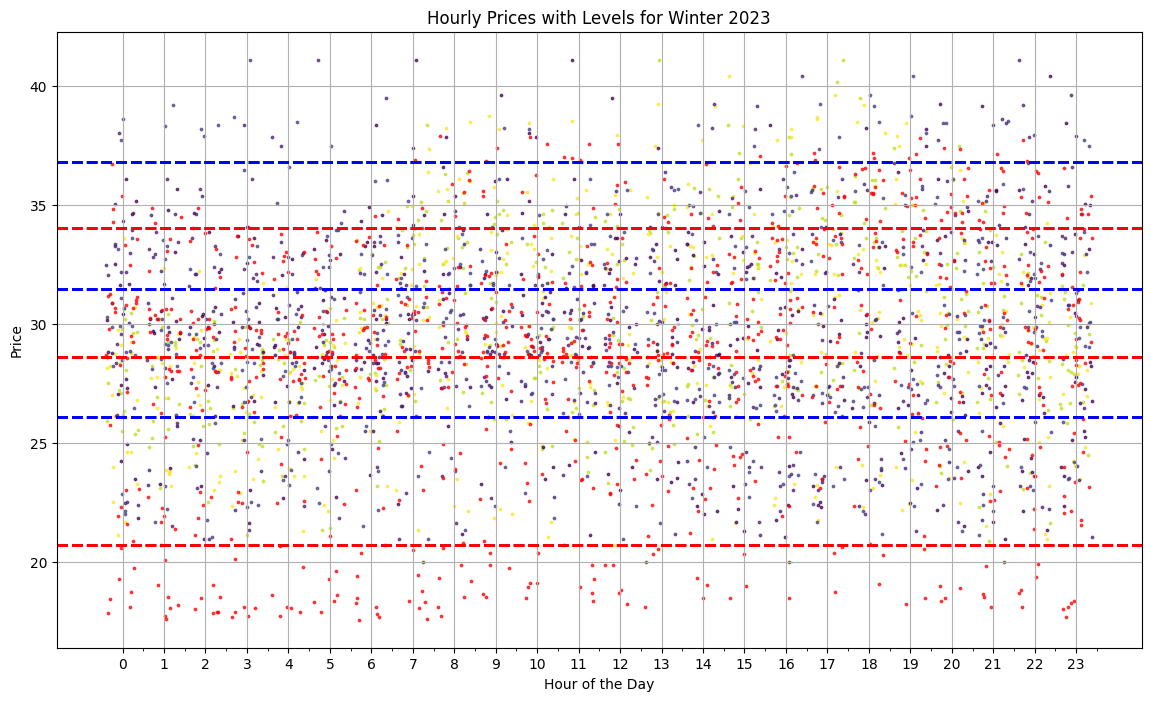

In [92]:
import calendar
import datetime
dates = pd.date_range(start='2023-01-01', periods=365)
months = dates.month
weekdays = dates.weekday
month_names = [calendar.month_name[i] for i in range(1, 13)]
viridis_cmap = plt.get_cmap('viridis', 12)
unique_colors = viridis_cmap(np.linspace(0, 1, 12))

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def remove_outliers(data, n_clusters=1, distance_threshold=50):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    cluster_centers = kmeans.cluster_centers_
    print('single cluster for outlier removal: ', cluster_centers)

    distances = cdist(data, cluster_centers, 'euclidean')
    min_distances = np.min(distances, axis=1)

    is_outlier = min_distances > distance_threshold
    num_outliers = np.sum(is_outlier)
    #print(f"Number of outliers: {num_outliers}")
    filtered_data = data[~is_outlier]
    #return data
    return filtered_data

def plot_season_with_clusters(months_group, season_name):
    fig, ax = plt.subplots(figsize=(14, 8))
    
    all_weekday_prices = []
    all_weekend_prices = []
    all_weekday_hours = []
    all_weekend_hours = []
    
    for month in months_group:
        # Filter data for the current month
        month_mask = months == month
        prices_month = prices_reshaped[month_mask] # [[16, 17, 15, 23, ... (24 intotal)], [12, 23, 24,... ], ... (31 in total)]
        hours_month = np.tile(np.arange(24), sum(month_mask)) # [[0,1,2,3,...,23], [0,1,2,...,23], ... (31 in total)]
        prices_flat_month = prices_month.flatten() # [16, 17, 15, 23, ..., 35, 28] (24*31 in total)
        
        # Determine weekends
        weekends = weekdays[month_mask]
        weekends_repeated = np.repeat(weekends, 24)
        is_weekend = (weekends_repeated >= 5)
        
        # Collect data for clustering
        weekday_prices = prices_flat_month[~is_weekend]
        weekend_prices = prices_flat_month[is_weekend]
        
        all_weekday_prices.append(weekday_prices)
        all_weekend_prices.append(weekend_prices)
        
        hours_weekday = hours_month[~is_weekend]
        all_weekday_hours.append(hours_weekday)
        hours_weekend = hours_month[is_weekend]
        all_weekend_hours.append(hours_weekend)
    
    all_hours_weekday = np.concatenate(all_weekday_hours)
    all_hours_weekend = np.concatenate(all_weekend_hours)
    all_weekday_prices = np.concatenate(all_weekday_prices) # 1-D
    all_weekend_prices = np.concatenate(all_weekend_prices)
    
    # Reshape for clustering!
    weekday_prices_reshaped = np.tile(all_weekday_prices, (24, 1)).T # 2-D, make the 1-D data in days (every 24 data together)
    weekend_prices_reshaped = np.tile(all_weekend_prices, (24, 1)).T

    weekday_prices_reshaped_clean = remove_outliers(weekday_prices_reshaped)
    weekend_prices_reshaped_clean = remove_outliers(weekend_prices_reshaped)

    # Apply K-means clustering
    kmeans_weekday = KMeans(n_clusters=3, random_state=0).fit(weekday_prices_reshaped_clean)
    kmeans_weekend = KMeans(n_clusters=3, random_state=0).fit(weekend_prices_reshaped_clean)
    weekday_centers = np.sort(kmeans_weekday.cluster_centers_.flatten()) # (18, 18, 18, ... , 22, 22, 22, ..., 30, 30, 30) 24*3 elements in total
    print('weekday: ', weekday_centers)
    weekend_centers = np.sort(kmeans_weekend.cluster_centers_.flatten())
    print('weekend: ', weekend_centers)

    weekday_prices_clean = weekday_prices_reshaped_clean[:, 0]
    weekend_prices_clean = weekend_prices_reshaped_clean[:, 0]
    
    print('weekday no filter: ', len(all_weekday_prices))
    print('weekday with filter: ', len(weekday_prices_clean))
    print('weekday gefiltert: ', len(all_weekday_prices) - len(weekday_prices_clean))
    print('weekend no filter: ', len(all_weekend_prices))
    print('weekend with filter: ', len(weekend_prices_clean))
    print('weekend gefiltert: ', len(all_weekend_prices) - len(weekend_prices_clean))
    
    hours_weekday_clean = all_hours_weekday[np.isin(all_weekday_prices, weekday_prices_clean)]
    hours_weekend_clean = all_hours_weekend[np.isin(all_weekend_prices, weekend_prices_clean)]
    #hours_weekday_jittered = hours_weekday_clean + np.random.uniform(-0.4, 0.4, len(hours_weekday_clean))
    #hours_weekend_jittered = hours_weekend_clean + np.random.uniform(-0.4, 0.4, len(hours_weekend_clean))
    #ax.scatter(hours_weekday_jittered, weekday_prices_clean, c='blue', alpha=0.5, s=2, label='_nolegend_')
    #ax.scatter(hours_weekend_jittered, weekend_prices_clean, c='red', alpha=0.7, s=3, label='_nolegend_')

    def split_data_by_month(data, month_days):
        in_months = [[] for _ in range(len(month_days))]
        new_data = data
        for x in range(len(month_days)):
            count = 0
            updated_data = new_data
            for i in range(len(updated_data)):
                if i == 0:
                    pass
                else:
                    if updated_data[i] < updated_data[i - 1]:
                        count += 1
                        if count == month_days[x]:
                            in_months[x].extend(updated_data[:i])
                            new_data = updated_data[i:]
        in_months[-1].extend(updated_data)
        return in_months
        
    weekday_days_counts = []
    for month in months_group:
        num_days = calendar.monthrange(2023, month)[1]
        count = sum(1 for day in range(1, num_days + 1) if datetime.date(2023, month, day).weekday() < 5)
        weekday_days_counts.append(count)

    hours_month = split_data_by_month(hours_weekday_clean, weekday_days_counts)
    print('sum of seperated data points: ', sum(len(i) for i in hours_month))
    hours = []
    for m in range(len(months_group)):
        prices = weekday_prices_clean[len(hours):len(hours) + len(hours_month[m])]
        hours = hours_month[m]
        hours_jittered = hours + np.random.uniform(-0.4, 0.4, len(hours))
        ax.scatter(hours_jittered, prices, c=[unique_colors[months_group[m]-1]], alpha=0.7, s=3, label=month_names[months_group[m]-1])
    weekend_hours_jittered = hours_weekend_clean + np.random.uniform(-0.4, 0.4, len(hours_weekend_clean))
    ax.scatter(weekend_hours_jittered, weekend_prices_clean, c='red', alpha=0.7, s=3, label=month_names[months_group[m]-1])
    
    for i, center in enumerate(weekday_centers):
        ax.axhline(y=center, color='blue', alpha=0.3, linewidth=2, linestyle='--', label=f'Weekday Level {i+1}')
    for i, center in enumerate(weekend_centers):
        ax.axhline(y=center, color='red', alpha=0.3, linewidth=2, linestyle='--', label=f'Weekend Level {i+1}')
    
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Price')
    ax.set_title(f'Hourly Prices with Levels for {season_name} 2023')
    ax.set_xticks(np.arange(24))
    ax.set_xticks(np.arange(24) + 0.5, minor=True)  # Add minor ticks for better separation
    ax.grid(True)
    
    # Save the plot as an image
    #plt.savefig(r'C:/Users/fu/Downloads/Dokumente/Smart Tariffe/TG/Datenanalyse/TG_Datenanalyser/Datenanalyse/price levels/' + 'Levels for ' + f'{season_name}_2023.png')
    #plt.show()

spring_summer_months = [4, 5, 6, 7, 8, 9, 10]
winter_months = [11, 12, 1, 2, 3]
single_month = [3]
#plot_season_with_clusters(spring_summer_months, 'Summer')
plot_season_with_clusters(winter_months, 'Winter')
#plot_season_with_clusters(single_month, 'Month_' + f'{single_month[0]}')

winter weekday


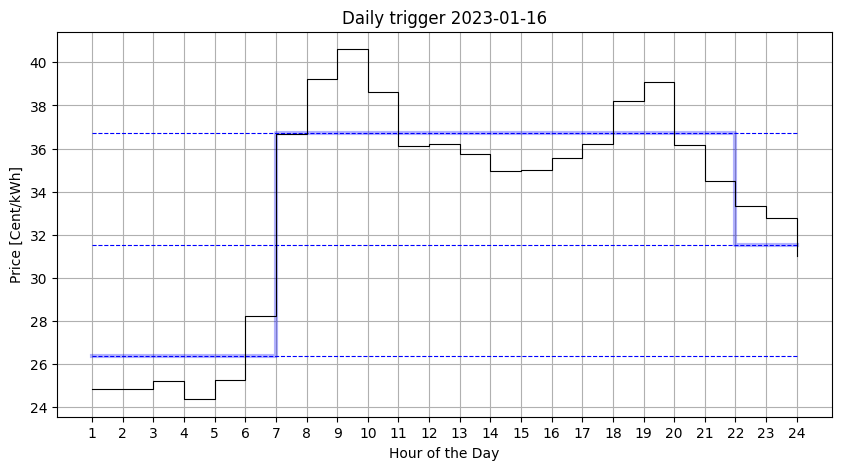

In [3]:
"""
Beispiele für Auslösung
"""
import datetime

#summer_weekday_levels = [25.73, 29.85, 34.56]
#summer_weekend_levels = [18.93, 26.49, 30.95]
# winter_weekday_levels = [21.73, 29.54, 36.26]
# winter_weekend_levels = [20.15, 28.53, 34.25]

# results from original outlier removal method
summer_weekday_levels = [26.09, 29.97, 34.60]
summer_weekend_levels = [19.05, 26.36, 30.80]
winter_weekday_levels = [26.39, 31.51, 36.71]
winter_weekend_levels = [21.49, 28.77, 34.07]

example_date = '2023-01-16'
date_obj = datetime.datetime.strptime(example_date, '%Y-%m-%d').date()
day_of_year = date_obj.timetuple().tm_yday
day_of_week = date_obj.weekday()
month_of_year = date_obj.month

if 4 <= month_of_year <= 10:
    if day_of_week < 5:
        levels = summer_weekday_levels
        print('summer weekday')
    else:
        levels = summer_weekend_levels
        print('summer weekend')
else:
    if day_of_week < 5:
        levels = winter_weekday_levels
        print('winter weekday')
    else:
        levels = winter_weekend_levels
        print('winter weekend')
    
def plot_daily_tarif(data, day):
    
    day_data = data[day - 1]
    hours = list(range(1, 25))
    plt.figure(figsize=(10, 5))
    
    for level in levels:
        plt.hlines(level, 1, 24, linestyles='dashed', colors='blue', linewidth=0.8)
    nearest_levels = []
    for value in day_data:
        distances = [abs(value - level) for level in levels]
        nearest_level = levels[np.argmin(distances)]
        nearest_levels.append(nearest_level)
        
    plt.step(hours, nearest_levels, where='post', color='blue', alpha=0.3, linewidth=3)
    plt.step(hours, day_data, where='post', color='black', linewidth=0.8)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Price [Cent/kWh]')
    plt.title(f'Daily trigger {example_date}')
    plt.grid(True)
    plt.xticks(hours)
    #plt.savefig('C:/Users/fu/Downloads/Dokumente/Smart Tariffe/TG/Datenanalyse/TG_Datenanalyser/Pictures/trigger examples/' + f'trigger {example_date}.png')
    plt.show()

plot_daily_tarif(prices_reshaped, day_of_year)

Text(0.5, 0.98, '3-Stufen Fix-Step optimiert')

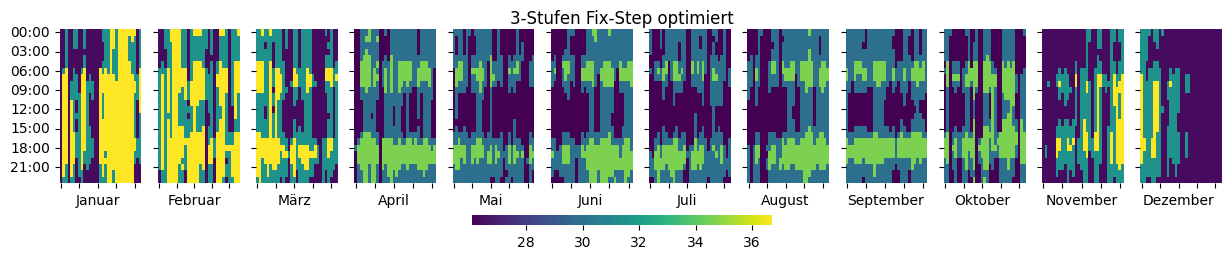

In [5]:
'''
export result of triggering
'''
import datetime
import seaborn as sns

summer_weekday_levels = [26.09, 29.97, 34.60]
summer_weekend_levels = [19.05, 26.36, 30.80]
winter_weekday_levels = [26.39, 31.51, 36.71]
winter_weekend_levels = [21.49, 28.77, 34.07]

datetime_index = pd.date_range(start='2023-01-01 00:00:00', end='2023-12-31 23:00:00', freq='H')
df = pd.DataFrame(index=datetime_index, columns=['dynamic prices', 'tariff'])
df['dynamic prices'] = prices

for i, timestamp in enumerate(df.index):
    month_of_year = timestamp.month
    is_weekend = timestamp.weekday() >= 5
    
    if 4 <= month_of_year <= 10:
        if day_of_week < 5:
            levels = summer_weekday_levels
        else:
            levels = summer_weekend_levels
    else:
        if day_of_week < 5:
            levels = winter_weekday_levels
        else:
            levels = winter_weekend_levels

    dynamic = prices[i]
    nearest_level = min(levels, key=lambda x: abs(x - dynamic))
    df.at[timestamp, 'tariff'] = nearest_level

#df.to_csv(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\Datenanalyse\result.csv')

#################### visualisieren ################################################################################
df['tariff'] = df['tariff'].astype(float)
month_names = ["Januar", "Februar", "März", "April", "Mai",  "Juni", "Juli", "August", "September", "Oktober",
                       "November", "Dezember"]
df["Date"] = pd.to_datetime(df.index.date)
df["Time"] = df.index.time
fig, ax = plt.subplots(ncols=12, sharey=True, figsize=(15, 2))
cbar_ax = fig.add_axes([0.4, -0.1, 0.2, 0.05])

for i, (month, group) in enumerate(df.groupby(df["Date"].dt.month)):
    group["hour_time"] = group["Time"].apply(lambda x: x.strftime("%H:%M"))
    month_data = group.pivot_table(index="hour_time", columns="Date", values="tariff")
    month_data.columns = [x.strftime("%Y-%m-%d") for x in month_data.columns]

    sns.heatmap(
        month_data,
        cmap="viridis",
        ax=ax[i],
        cbar_ax=cbar_ax,
        cbar_kws={"orientation": "horizontal"},
        vmin=df["tariff"].min(),
        vmax=df["tariff"].max(),
    )
    ax[i].set_ylabel("")
    labels = ax[i].get_xticklabels()
    mid = round(len(labels) / 2)
    for j, label in enumerate(labels):
        if j == mid:
            label.set_text(f"{month_names[month - 1]}")
        if j != mid:
            label.set_text("")
            labels[j] = label
    ax[i].set_xticklabels(labels, rotation=0)

fig.suptitle("3-Stufen Fix-Step optimiert")

In [7]:
'''
calculate costs for customer
'''
import pandas as pd

last = pd.read_excel(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\LastProfilen\Standardlastgangsynthese Strom.xlsx', sheet_name='Ausgabe ')
last['Datum '] = pd.to_datetime(last['Datum '])
last.set_index('Datum ', inplace=True)
hourly_last = last['Energie in kWh'].resample('H').sum()
tariff = pd.read_csv(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\Datenanalyse\result.csv', index_col=[0])
tariff.index = pd.to_datetime(tariff.index)
tariff['Abrechnung_Stufen'] = tariff['tariff'] * hourly_last * 0.01
tariff['Abrechnung_Dynamic'] = tariff['dynamic prices'] * hourly_last * 0.01
tariff.to_csv(r'C:\Users\fu\Downloads\Dokumente\Smart Tariffe\TG\Datenanalyse\result.csv')

summer = tariff.loc['2023-04-01':'2023-10-31']
winter = pd.concat([tariff.loc['2023-01-01':'2023-03-31'], tariff.loc['2023-11-01':'2023-12-31']])
print('total cost dynamic: ', tariff['Abrechnung_Dynamic'].sum())
print('summer cost dynamic: ', summer['Abrechnung_Dynamic'].sum())
print('winter cost dynamic: ', winter['Abrechnung_Dynamic'].sum())

print('total cost 3 Stufen: ', tariff['Abrechnung_Stufen'].sum())
print('summer cost 3 Stufen: ', summer['Abrechnung_Stufen'].sum())
print('winter cost 3 Stufen: ', winter['Abrechnung_Stufen'].sum())

total cost dynamic:  1779.0187483583006
summer cost dynamic:  913.0928862218308
winter cost dynamic:  865.92586213647
total cost 3 Stufen:  1824.887780104918
summer cost 3 Stufen:  944.5098339690842
winter cost 3 Stufen:  880.3779461358339
